In [69]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

In [70]:
df = pd.read_csv("pokemon.csv")
df.head()

,Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,...,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,...,Green,True,0.875,Monster,Grass,False,0.71,6.9,45,quadruped
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,...,Green,True,0.875,Monster,Grass,False,0.99,13.0,45,quadruped
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,...,Green,True,0.875,Monster,Grass,True,2.01,100.0,45,quadruped
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,...,Red,True,0.875,Monster,Dragon,False,0.61,8.5,45,bipedal_tailed
4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,...,Red,True,0.875,Monster,Dragon,False,1.09,19.0,45,bipedal_tailed


In [71]:
df.shape

(721, 23)

In [72]:
df.isna().sum()

Number                0
Name                  0
Type_1                0
Type_2              371
Total                 0
HP                    0
Attack                0
Defense               0
Sp_Atk                0
Sp_Def                0
Speed                 0
Generation            0
isLegendary           0
Color                 0
hasGender             0
Pr_Male              77
Egg_Group_1           0
Egg_Group_2         530
hasMegaEvolution      0
Height_m              0
Weight_kg             0
Catch_Rate            0
Body_Style            0
dtype: int64

In [73]:
df.Type_2.fillna('Same', inplace = True)

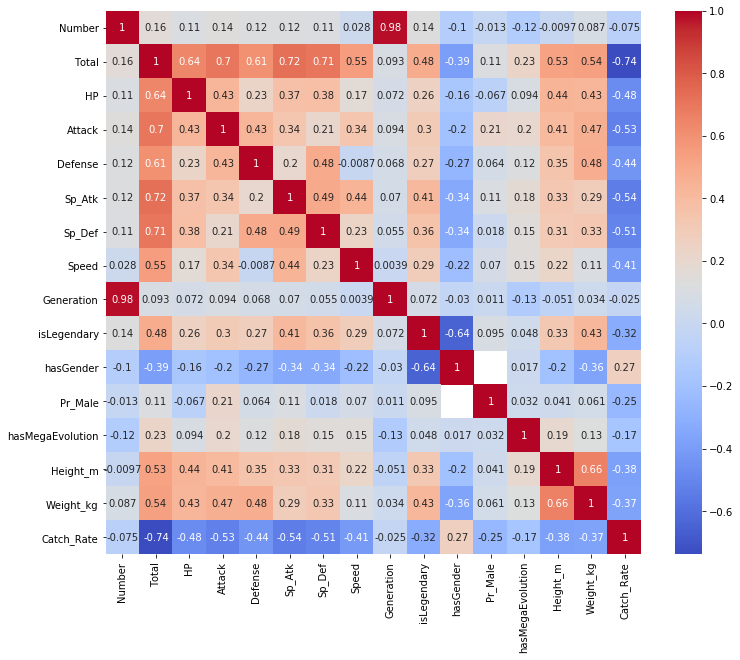

In [74]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot = True,cmap='coolwarm' )

In [75]:
df.drop(columns=['Catch_Rate','hasGender','Egg_Group_2','Name','Number','Color', 'Pr_Male'], inplace=True)

In [76]:
df.head()

,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,isLegendary,Egg_Group_1,hasMegaEvolution,Height_m,Weight_kg,Body_Style
0,Grass,Poison,318,45,49,49,65,65,45,1,False,Monster,False,0.71,6.9,quadruped
1,Grass,Poison,405,60,62,63,80,80,60,1,False,Monster,False,0.99,13.0,quadruped
2,Grass,Poison,525,80,82,83,100,100,80,1,False,Monster,True,2.01,100.0,quadruped
3,Fire,Same,309,39,52,43,60,50,65,1,False,Monster,False,0.61,8.5,bipedal_tailed
4,Fire,Same,405,58,64,58,80,65,80,1,False,Monster,False,1.09,19.0,bipedal_tailed


In [77]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder()
label_encoder2 = preprocessing.LabelEncoder()
label_encoder3 = preprocessing.LabelEncoder()
label_encoder4 = preprocessing.LabelEncoder()

In [78]:
df.Type_1 = label_encoder.fit_transform(df.Type_1)

In [79]:
df.Type_2 = label_encoder.fit_transform(df.Type_2)

In [80]:
df.Egg_Group_1 = label_encoder.fit_transform(df.Egg_Group_1)
df.Body_Style = label_encoder.fit_transform(df.Body_Style)

In [81]:
df.isLegendary = label_encoder.fit_transform(df.isLegendary)
df.hasMegaEvolution = label_encoder.fit_transform(df.hasMegaEvolution)

In [82]:
df.head()

,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,isLegendary,Egg_Group_1,hasMegaEvolution,Height_m,Weight_kg,Body_Style
0,9,13,318,45,49,49,65,65,45,1,0,10,0,0.71,6.9,9
1,9,13,405,60,62,63,80,80,60,1,0,10,0,0.99,13.0,9
2,9,13,525,80,82,83,100,100,80,1,0,10,1,2.01,100.0,9
3,6,16,309,39,52,43,60,50,65,1,0,10,0,0.61,8.5,0
4,6,16,405,58,64,58,80,65,80,1,0,10,0,1.09,19.0,0


In [85]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['isLegendary'])
y = df['isLegendary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [86]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(X_train,y_train)

F:\anaconda1\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [87]:
svc.score(X_test,y_test)

0.9631336405529954

In [88]:
from sklearn.model_selection import cross_val_score
lr_accuracies = cross_val_score(svc,X_test,y_test, cv = 20)
print(lr_accuracies.mean())

0.9586363636363636
F:\anaconda1\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 11 members, which is less than n_splits=20.
  % (min_groups, self.n_splits)), UserWarning)
